In [1]:
import numpy as np
from matplotlib import pyplot as plt
import DeeperDream as dd
from scipy import stats
import importlib
from copy import copy
from scipy.stats import multivariate_normal
importlib.reload(dd)

<module 'DeeperDream' from 'C:\\Work\\Enhance\\Enhance-Deeper-Dream\\DeeperDream\\__init__.py'>

In [2]:
def CalHarInd(x,y_hat,means):
    if mean.shape[0] == 1:
        return None
    
    nk = np.unique(y_hat,return_counts=True)[1]
    k = means.shape[0]
    sep = nk.T @ np.sum((means - np.mean(x,axis=0))**2,axis=1)
    comp = np.sum([np.sum((x[y_hat == i] - means)**2, axis=1) for i in u])
    
    return sep / comp * (x.shape[0] - u.shape[0]) / (u.shape[0]-1)
            

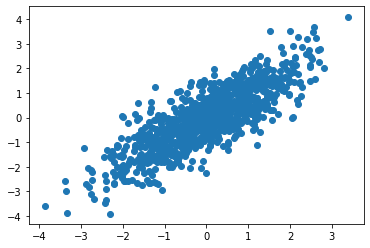

In [3]:
cov = np.array([
[1,0.6],
[0.4,1]
])
x = np.random.randn(1000,2) @ cov
plt.scatter(x[:,0],x[:,1])

In [4]:
mu = np.array([[1,1], [2,2], [3,3]])
x = np.array([[1,1],[2,2],[3,3],[4,4],[5,5],[6,6]])
diff = (np.dstack([x]*3) - mu.T)
diff[:,:,1]

array([[-1, -1],
       [ 0,  0],
       [ 1,  1],
       [ 2,  2],
       [ 3,  3],
       [ 4,  4]])

In [5]:
diff[:,:,1][[2,4]][:,0]

array([1, 3])

In [6]:
a = np.array([2,4]).T
b = np.array([3,2]).T
np.max([a,b],axis=0)

array([3, 4])

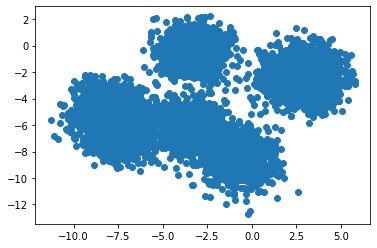

In [7]:
x,y = dd.Toy.Clusters(1000,7,2,4)
plt.scatter(x[:,0],x[:,1])

In [24]:
class Gaussian_Mixture:
    def __init__(self, k):
        self.k = k

    def Fit(self, x):
        self.means = x[np.random.choice(x.shape[0], size=self.k, replace=False), :]
        self.covs = [np.eye(x.shape[1])] * self.k
        self.covs = np.stack(self.covs)
        self.norms = [0] * self.k
        old_means = None
        old_covs = None
        i = 0
        while (old_means != self.means).any() or (old_covs != self.covs).any():
            print(f'{i}\r', end='')
            i += 1
            old_means = copy(self.means)
            old_covs = copy(self.covs)
            p_values = []
            for k in range(self.k):
                self.norms[k] = multivariate_normal(mean=self.means[k], cov=self.covs[k],allow_singular=True)
                p_values.append(self.norms[k].pdf(x))
            p_values = np.vstack(p_values)
            y_hat = np.argmax(p_values, axis=0)

            for k in range(self.k):
                self.means[k, :] = np.mean(x[y_hat == k], axis=0)
                self.covs[k, :, :] = np.cov(x[y_hat == k].T)

    def Predict(self, x):
        p_values = []
        for k in range(self.k):
            p_values.append(self.norms[k].pdf(x))
        p_values = np.vstack(p_values)
        y_hat = np.argmax(p_values, axis=0)
        return y_hat

    def PValues(self, x):
        p_values = []
        for k in range(self.k):
            p_values.append(self.norms[k].pdf(x))
        p_values = np.vstack(p_values)
        return p_values

    def Loss(self, x):
        p_values = self.PValues(x)
        return np.sum(-np.log(np.max(p_values, axis=0)))

In [9]:
gm = Gaussian_Mixture(k=6)
gm.Fit(x)

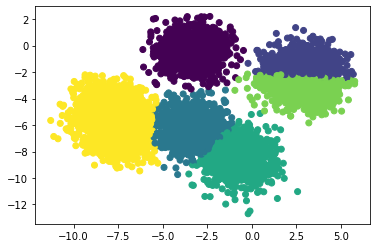

In [10]:
y_hat = gm.Predict(x)
plt.scatter(x[:,0],x[:,1],c=y_hat)

In [11]:
def Silhouette(x, y_hat, means):
    b = np.array([np.mean(np.sqrt(np.sum((x[i==y_hat] - means[i])**2, axis=1)), axis=0) for i in range(means.shape[0])])
    a = np.mean(
        [np.sqrt(np.sum((np.dstack([x]*means.shape[0]) - means.T)**2, axis=1))[i, range(means.shape[0]) != yi] for i, yi in enumerate(y_hat)], 
        axis=1)
    
    return np.array([(a[i] - b[yi]) / np.maximum(a[i], b[yi]) for i, yi in enumerate(y_hat)])

In [12]:
sil = Silhouette(x,gm.Predict(x),gm.means)

(0, 1)

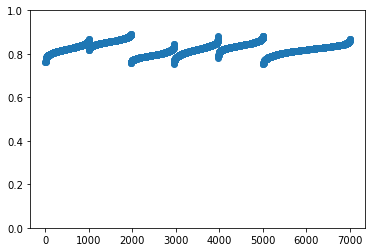

In [13]:
bins = []
for k in range(gm.means.shape[0]):
    bins.append(np.sort(sil[y_hat==k]))

bins = np.hstack(bins)
plt.scatter(np.arange(bins.shape[0]), bins)
plt.ylim(0, 1)

In [14]:
bins

array([0.76027968, 0.76292481, 0.76376276, ..., 0.86737616, 0.86873605,
       0.86943736])

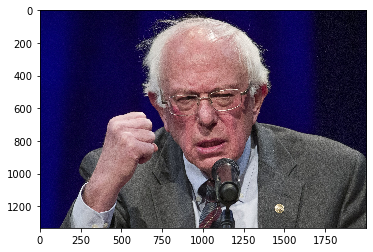

In [17]:
im = plt.imread('berniesanders.jpg')
plt.imshow(im)

In [18]:
im

array([[[ 7,  3, 97],
        [ 6,  2, 96],
        [ 4,  0, 94],
        ...,
        [ 5,  3, 25],
        [16, 14, 36],
        [13, 11, 33]],

       [[ 4,  0, 94],
        [ 5,  1, 95],
        [ 7,  3, 97],
        ...,
        [ 7,  5, 27],
        [18, 16, 38],
        [18, 16, 38]],

       [[ 3,  0, 91],
        [ 7,  4, 95],
        [11,  8, 99],
        ...,
        [12, 10, 32],
        [10,  8, 30],
        [ 9,  7, 29]],

       ...,

       [[ 5,  6, 88],
        [ 6,  6, 92],
        [ 5,  4, 98],
        ...,
        [76, 78, 77],
        [61, 63, 62],
        [49, 51, 50]],

       [[ 3,  4, 86],
        [ 4,  4, 90],
        [ 3,  2, 96],
        ...,
        [61, 63, 62],
        [50, 52, 51],
        [57, 59, 58]],

       [[ 2,  3, 85],
        [ 2,  2, 88],
        [ 2,  1, 95],
        ...,
        [54, 56, 55],
        [45, 47, 46],
        [62, 64, 63]]], dtype=uint8)

In [19]:
orig_shape = im.shape

In [20]:
im = im.reshape(-1,3)
im

array([[ 7,  3, 97],
       [ 6,  2, 96],
       [ 4,  0, 94],
       ...,
       [54, 56, 55],
       [45, 47, 46],
       [62, 64, 63]], dtype=uint8)

In [25]:
gmm = Gaussian_Mixture(k=5)
gmm.Fit(im)
y_hat = gmm.Predict(im)

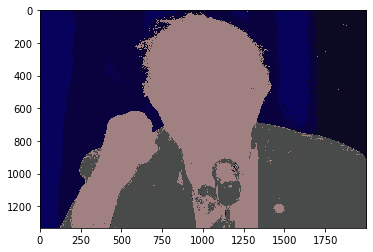

In [28]:
im_comp = gmm.means[y_hat].reshape(orig_shape)
plt.imshow(im_comp)

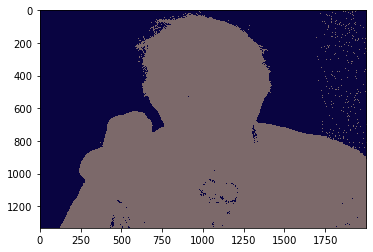

In [29]:
gmm = Gaussian_Mixture(k=2)
gmm.Fit(im)
y_hat = gmm.Predict(im)
im_comp = gmm.means[y_hat].reshape(orig_shape)
plt.imshow(im_comp)

In [ ]:
gmm = Gaussian_Mixture(k=10)
gmm.Fit(im)

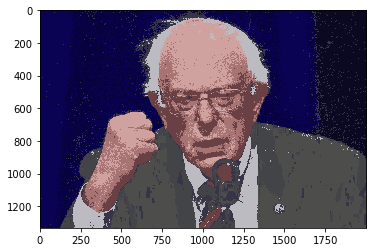

In [32]:
y_hat = gmm.Predict(im)
im_comp = gmm.means[y_hat].reshape(orig_shape)
plt.imshow(im_comp)